In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv("redwine.csv")

In [28]:
df = pd.DataFrame(data)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
df.shape

(1599, 12)

In [30]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [36]:
# checking the null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
df['quality'].nunique()

6

In [38]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [39]:
df['quality'] = np.where(df['quality']>5, 1, df['quality'])
df['quality'] = np.where(df['quality']!=1, 0, df['quality'])
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [40]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [41]:
df.shape
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [42]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [43]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [44]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

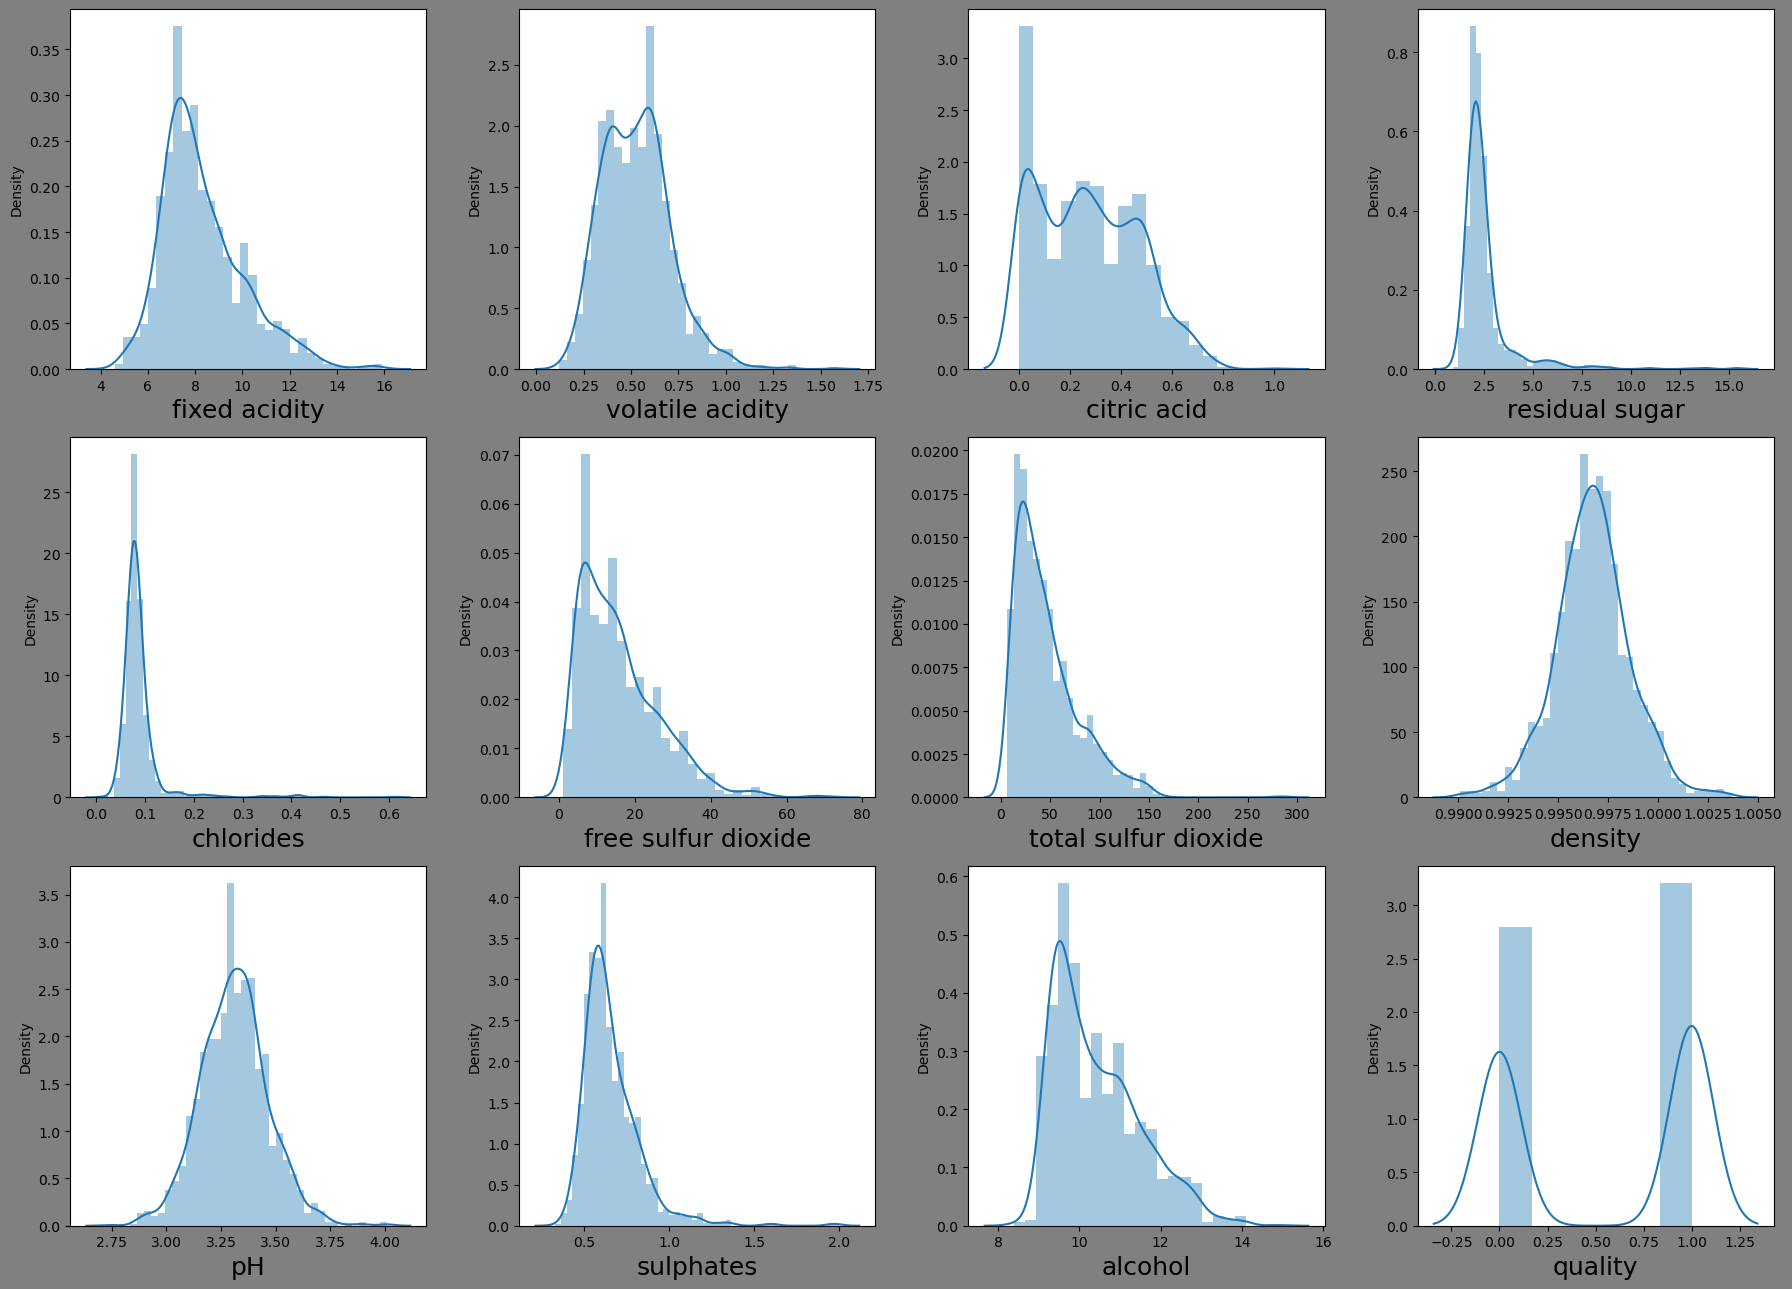

In [45]:
plt.figure(figsize=(18,13), facecolor='grey')
plotnumber=1

for col in df:
    if plotnumber<=12:
        axes = plt.subplot(3,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=18)

    plotnumber+=1
plt.tight_layout()

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

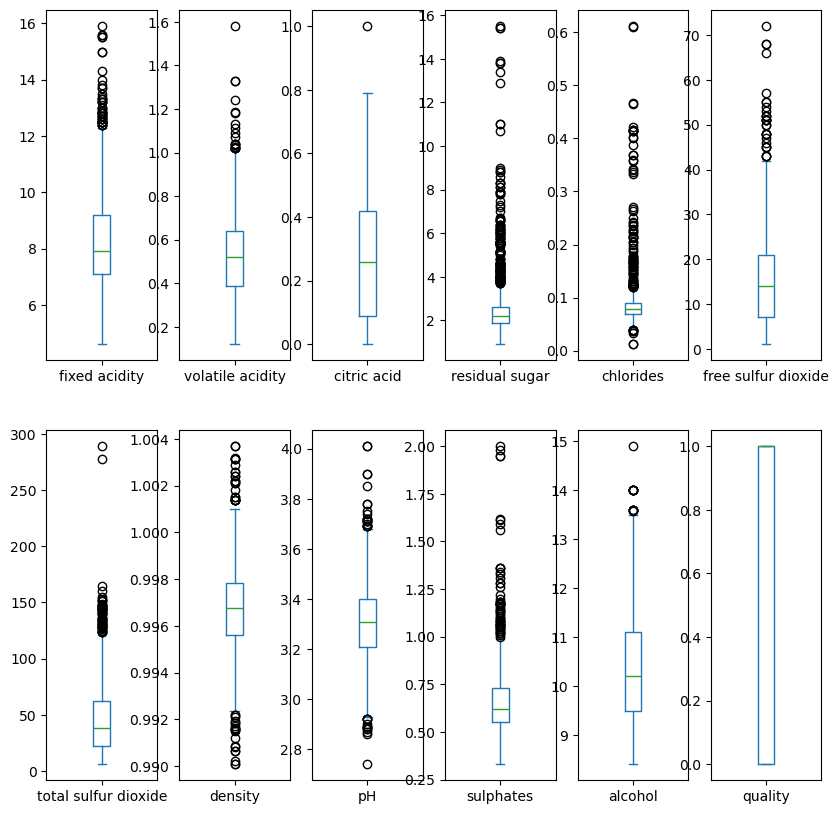

In [46]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [47]:
df.corr()['quality'].sort_values()

volatile acidity       -0.321441
total sulfur dioxide   -0.231963
density                -0.159110
chlorides              -0.109494
free sulfur dioxide    -0.061757
pH                     -0.003264
residual sugar         -0.002160
fixed acidity           0.095093
citric acid             0.159129
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

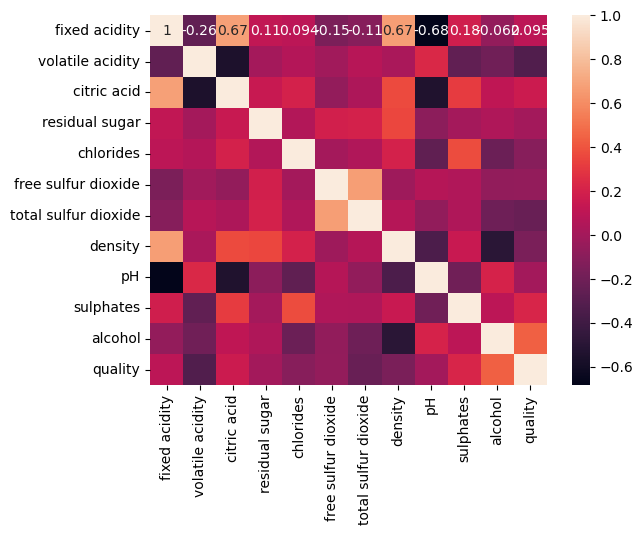

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,1.072004
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,1.072004
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,1.072004
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.932832
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,1.072004
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,1.072004
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.932832
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.932832
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,1.072004


In [51]:
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [52]:
df_new = df[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [53]:
df_new.shape

(1458, 12)

In [54]:
x=df_new.drop(['quality'],axis=1)
y=df_new['quality']

In [55]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [56]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1458, dtype: int64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=355)

In [58]:
x_train.shape

(1093, 11)

In [59]:
x_test.shape

(365, 11)

In [60]:
y_train.shape

(1093,)

In [61]:
y_test.shape

(365,)

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [63]:
lr.fit(x_train,y_train)

LogisticRegression()

In [64]:
lr.score(x_train,y_train)

0.7401646843549863

In [65]:
lr.coef_

array([[-0.03205407, -1.71905405, -0.25534916, -0.07874255, -0.02705395,
         0.03506953, -0.02111219, -0.76558565, -1.95678437,  3.45542909,
         0.78655343]])

In [66]:
lr.intercept_

array([-1.05962025])

In [67]:
pred=lr.predict(x_train)
print('Predicted value and actual value',pred,y_train)

Predicted value and actual value [1 1 0 ... 1 0 1] 1497    1
289     0
1381    0
184     1
1173    1
       ..
62      1
1448    0
1507    1
720     0
854     1
Name: quality, Length: 1093, dtype: int64


In [68]:
pred_test=lr.predict(x_test)
print('Predicted value and actual value',pred,y_test)

Predicted value and actual value [1 1 0 ... 1 0 1] 946     1
1145    1
1494    1
862     0
375     1
       ..
967     0
1202    1
984     0
1116    1
1166    0
Name: quality, Length: 365, dtype: int64


In [69]:
from sklearn.metrics import mean_squared_error,r2_score
print("the testing accuracy: ",mean_squared_error(pred_test,y_test))
print("the testing r2_score accuracy: ",r2_score(pred_test,y_test))

the testing accuracy:  0.2273972602739726
the testing r2_score accuracy:  0.08678483149454397


In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
pred_traindt = dt.predict(x_train)
print('Test_Accuracy', accuracy_score(y_test,preddt)*100)
print('Train_Accuracy', accuracy_score(y_train,pred_traindt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test_Accuracy 75.89041095890411
Train_Accuracy 100.0
[[131  45]
 [ 43 146]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       176
           1       0.76      0.77      0.77       189

    accuracy                           0.76       365
   macro avg       0.76      0.76      0.76       365
weighted avg       0.76      0.76      0.76       365



In [75]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Test_Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


Test_Accuracy 61.369863013698634
[[ 54 122]
 [ 19 170]]
              precision    recall  f1-score   support

           0       0.74      0.31      0.43       176
           1       0.58      0.90      0.71       189

    accuracy                           0.61       365
   macro avg       0.66      0.60      0.57       365
weighted avg       0.66      0.61      0.58       365



In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print('Test_Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Test_Accuracy 83.28767123287672
[[143  33]
 [ 28 161]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       176
           1       0.83      0.85      0.84       189

    accuracy                           0.83       365
   macro avg       0.83      0.83      0.83       365
weighted avg       0.83      0.83      0.83       365



In [77]:
import pickle
filename = 'Wine.pkl'
pickle.dump(rf,open(filename,'wb'))

In [78]:
loaded_model = pickle.load(open('Wine.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

83.28767123287672


In [79]:
con = pd.DataFrame([loaded_model.predict(x_test)[:],predrf[:]],index=['predicted','original'])

In [80]:
con

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
predicted,1,1,1,0,1,1,0,0,1,0,...,1,1,0,0,1,0,1,1,1,1
original,1,1,1,0,1,1,0,0,1,0,...,1,1,0,0,1,0,1,1,1,1
